#Needed Library

In [ ]:
!pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = "/content/drive/MyDrive/flight-price-train.csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head(2)

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13


In [ ]:
df.shape

(45000, 19)

In [ ]:
df.columns

Index(['Flight_ID', 'Airline', 'Departure_City', 'Arrival_City', 'Distance',
       'Departure_Time', 'Arrival_Time', 'Duration', 'Aircraft_Type',
       'Number_of_Stops', 'Day_of_Week', 'Month_of_Travel', 'Holiday_Season',
       'Demand', 'Weather_Conditions', 'Passenger_Count', 'Promotion_Type',
       'Fuel_Price', 'Flight_Price'],
      dtype='object')

In [ ]:
df.columns = [column.lower() for column in df.columns]
df.columns

Index(['flight_id', 'airline', 'departure_city', 'arrival_city', 'distance',
       'departure_time', 'arrival_time', 'duration', 'aircraft_type',
       'number_of_stops', 'day_of_week', 'month_of_travel', 'holiday_season',
       'demand', 'weather_conditions', 'passenger_count', 'promotion_type',
       'fuel_price', 'flight_price'],
      dtype='object')

In [ ]:
df.describe()

,distance,duration,number_of_stops,passenger_count,fuel_price,flight_price
count,44909.000000,45000.000000,45000.000000,45000.000000,44910.000000,45000.000000
mean,5482.238727,7.852555,0.665667,174.928822,0.850192,574.606270
std,2594.847860,3.292880,0.750578,72.372980,0.201736,160.239344
min,1000.000000,1.280000,0.000000,50.000000,0.500000,173.350000
25%,3230.000000,5.040000,0.000000,112.000000,0.680000,455.297500
50%,5476.000000,7.840000,1.000000,175.000000,0.850000,565.750000
75%,7725.000000,10.650000,1.000000,238.000000,1.020000,679.692500
max,10000.000000,14.450000,3.000000,300.000000,1.200000,1261.640000


In [ ]:
df['flight_price'].value_counts()

471.25     6
395.54     6
473.75     6
536.57     6
540.21     6
          ..
641.61     1
426.41     1
1012.71    1
322.05     1
532.92     1
Name: flight_price, Length: 31336, dtype: int64

#Data Cleaning
##Missing values

In [ ]:
df.isnull().sum()

flight_id                0
airline               3573
departure_city         340
arrival_city           186
distance                91
departure_time           0
arrival_time             0
duration                 0
aircraft_type           43
number_of_stops          0
day_of_week            225
month_of_travel        267
holiday_season           0
demand                 317
weather_conditions     302
passenger_count          0
promotion_type         403
fuel_price              90
flight_price             0
dtype: int64

In [ ]:
df.dtypes

flight_id              object
airline                object
departure_city         object
arrival_city           object
distance              float64
departure_time         object
arrival_time           object
duration              float64
aircraft_type          object
number_of_stops         int64
day_of_week            object
month_of_travel        object
holiday_season         object
demand                 object
weather_conditions     object
passenger_count         int64
promotion_type         object
fuel_price            float64
flight_price          float64
dtype: object

In [ ]:
df['airline'].fillna(df['airline'].mode()[0],inplace = True)

In [ ]:
df['departure_city'].fillna(df['departure_city'].mode()[0],inplace = True)

In [ ]:
df['arrival_city'].fillna(df['arrival_city'].mode()[0],inplace = True)

In [ ]:
df['aircraft_type'].fillna(df['aircraft_type'].mode()[0],inplace = True)

In [ ]:
df['day_of_week'].fillna(df['day_of_week'].mode()[0],inplace = True)

In [ ]:
df['month_of_travel'].fillna(df['month_of_travel'].mode()[0],inplace = True)

In [ ]:
df['demand'].fillna(df['demand'].mode()[0],inplace = True)

In [ ]:
df['weather_conditions'].fillna(df['weather_conditions'].mode()[0],inplace = True)

In [ ]:
df['promotion_type'].fillna(df['promotion_type'].mode()[0],inplace=True)

In [ ]:
#conditions data fill with mean or median
#filling the missing values using statistical techniques
df = df.fillna({'distance': df['distance'].mean(),
              'fuel_price':df['fuel_price'].mean()})

In [ ]:
df.isnull().sum()

flight_id             0
airline               0
departure_city        0
arrival_city          0
distance              0
departure_time        0
arrival_time          0
duration              0
aircraft_type         0
number_of_stops       0
day_of_week           0
month_of_travel       0
holiday_season        0
demand                0
weather_conditions    0
passenger_count       0
promotion_type        0
fuel_price            0
flight_price          0
dtype: int64

#Wrong Formate

In [ ]:
df.dtypes

flight_id              object
airline                object
departure_city         object
arrival_city           object
distance              float64
departure_time         object
arrival_time           object
duration              float64
aircraft_type          object
number_of_stops         int64
day_of_week            object
month_of_travel        object
holiday_season         object
demand                 object
weather_conditions     object
passenger_count         int64
promotion_type         object
fuel_price            float64
flight_price          float64
dtype: object

In [ ]:
# Here we can see the wrong data formate in 'departure_time' and 'arrival_time'
#So we need to change the wrong formate

In [ ]:
import pandas as pd

In [ ]:
df['departure_time'] = pd.to_datetime(df['departure_time'])
df['arrival_time'] = pd.to_datetime(df['arrival_time'])

In [ ]:
df.head()

,flight_id,airline,departure_city,arrival_city,distance,departure_time,arrival_time,duration,aircraft_type,number_of_stops,day_of_week,month_of_travel,holiday_season,demand,weather_conditions,passenger_count,promotion_type,fuel_price,flight_price
0,F1,Airline B,Port Michael,Greenshire,8286.0,2023-11-10 08:23:00,2023-11-10 20:19:00,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,2023-11-10 20:28:00,2023-11-10 01:45:00,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,2023-11-10 11:30:00,2023-11-10 15:54:00,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,F4,Airline A,Blakefort,Crosbyberg,3145.0,2023-11-10 20:24:00,2023-11-10 01:21:00,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,2023-11-10 21:59:00,2023-11-10 06:04:00,8.09,Boeing 737,1,Thursday,January,None,Low,Clear,181,None,1.09,804.35


#Duplicate

In [ ]:
#Finding the Duplicates.
df.duplicated().sum()
#There is no duplicates.

0

In [ ]:
#Finding the text error

In [ ]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['flight_id',
 'airline',
 'departure_city',
 'arrival_city',
 'aircraft_type',
 'day_of_week',
 'month_of_travel',
 'holiday_season',
 'demand',
 'weather_conditions',
 'promotion_type']

In [ ]:
df['flight_id'].value_counts()

F1        1
F30004    1
F29996    1
F29997    1
F29998    1
         ..
F15002    1
F15003    1
F15004    1
F15005    1
F45000    1
Name: flight_id, Length: 45000, dtype: int64

In [ ]:
#may be this is useless better its remove
df.drop(columns = 'flight_id',inplace = True)

In [ ]:
df['airline'].value_counts()

Airline A    17436
Airline C    13809
Airline B    13755
Name: airline, dtype: int64

In [ ]:
df['departure_city'].value_counts()

Port Michael         389
West Michael          47
North Michael         42
South Michael         40
North David           39
                    ... 
New Jordanchester      1
North Morgan           1
North Mindy            1
Mcmillanberg           1
East Patriciafurt      1
Name: departure_city, Length: 23187, dtype: int64

In [ ]:
df["arrival_city"].value_counts()

North Michael       235
Port Michael         47
Lake Michael         42
New Michael          35
Michaelmouth         35
                   ... 
Summerland            1
North Lindafurt       1
West Waynetown        1
North Keithmouth      1
Gabrielville          1
Name: arrival_city, Length: 23479, dtype: int64

In [ ]:
df["aircraft_type"].value_counts()

Airbus A320    9154
Boeing 777     9059
Boeing 787     8952
Airbus A380    8943
Boeing 737     8892
Name: aircraft_type, dtype: int64

In [ ]:
df["day_of_week"].value_counts()

Sunday       6697
Saturday     6418
Friday       6414
Monday       6407
Wednesday    6406
Tuesday      6336
Thursday     6322
Name: day_of_week, dtype: int64

In [ ]:
df["month_of_travel"].value_counts()

January      4110
October      3812
April        3776
July         3755
November     3749
September    3731
March        3727
August       3712
December     3700
June         3672
May          3658
February     3598
Name: month_of_travel, dtype: int64

In [ ]:
df["holiday_season"].value_counts()

Spring    9036
None      9020
Fall      9010
Summer    8970
Winter    8964
Name: holiday_season, dtype: int64

In [ ]:
df["demand"].value_counts()

Low       29263
Medium     8954
High       6783
Name: demand, dtype: int64

In [ ]:
df['weather_conditions'].value_counts()

Cloudy    11711
Snow      11148
Rain      11093
Clear     11048
Name: weather_conditions, dtype: int64

In [ ]:
df['promotion_type'].value_counts()

Special Offer    15299
Discount         14889
None             14812
Name: promotion_type, dtype: int64

#OUTLIER

In [ ]:
float_data_cols = [var for var in df.columns if df[var].dtype=='float64']
float_data_cols

['distance', 'duration', 'fuel_price', 'flight_price']

In [ ]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['number_of_stops', 'passenger_count']

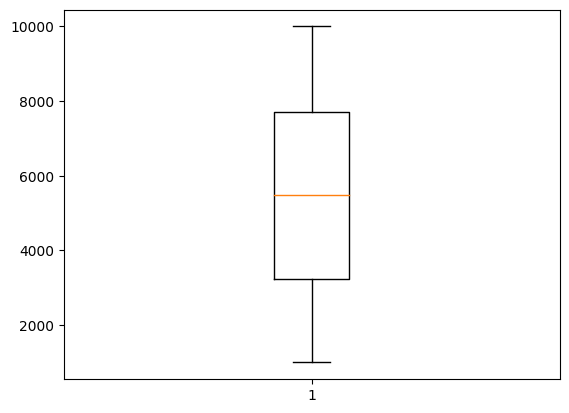

In [ ]:
#Creating the plot and finding the outlier
plt.boxplot(df['distance'])
plt.show()

In [ ]:
Q1 = df['distance'].quantile(0.25)
Q3 = df['distance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
lower_bound , upper_bound

(-3497.5, 14450.5)

In [ ]:
df.distance = df.distance.clip(lower_bound,upper_bound)

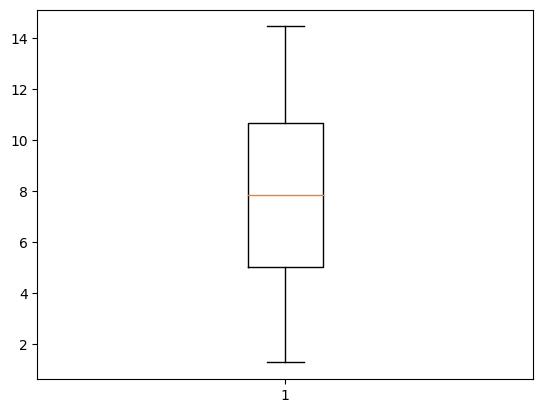

In [ ]:
plt.boxplot(df['duration'])
plt.show()

In [ ]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-3.375000000000001, 19.065)

In [ ]:
df.duration = df.duration.clip(lower_bound,upper_bound)

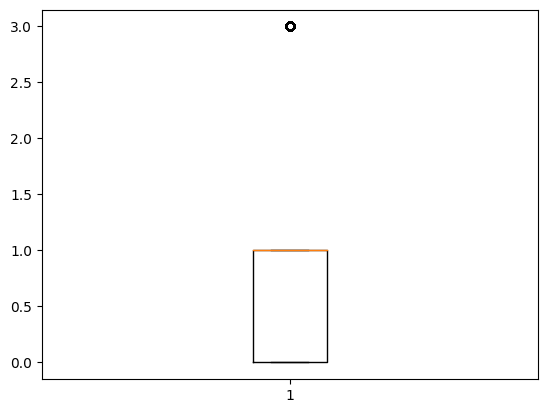

In [ ]:
plt.boxplot(df['number_of_stops'])
plt.show()

In [ ]:
Q1 = df['number_of_stops'].quantile(0.25)
Q3 = df['number_of_stops'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-1.5, 2.5)

In [ ]:
df.number_of_stops = df.number_of_stops.clip(lower_bound , upper_bound)

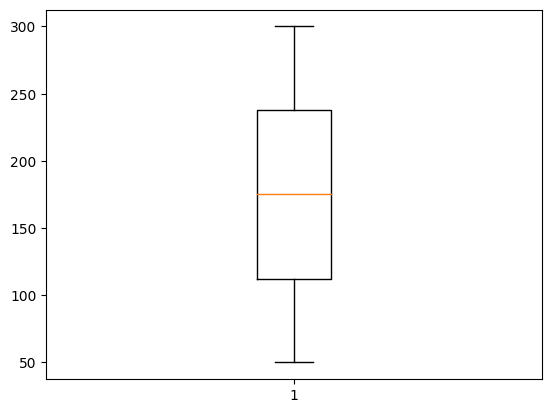

In [ ]:
plt.boxplot(df['passenger_count'])
plt.show()

In [ ]:
Q1 = df['passenger_count'].quantile(0.25)
Q3 = df['passenger_count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-77.0, 427.0)

In [ ]:
df.passenger_count = df.passenger_count.clip(lower_bound , upper_bound)

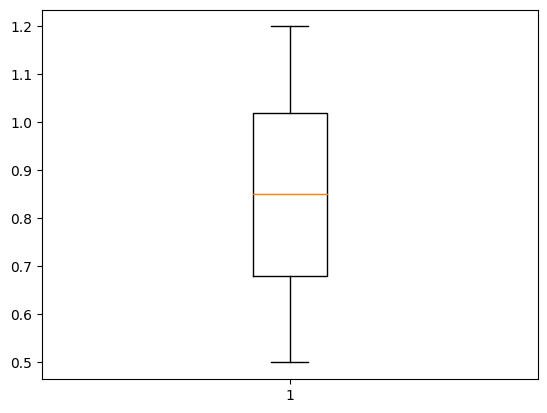

In [ ]:
#Fuel_Price
plt.boxplot(df['fuel_price'] )

# show plot
plt.show()

In [ ]:
Q1 = df['fuel_price'].quantile(0.25)
Q3 = df['fuel_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(0.17000000000000004, 1.53)

In [ ]:
df.fuel_price = df.fuel_price.clip(lower_bound , upper_bound)

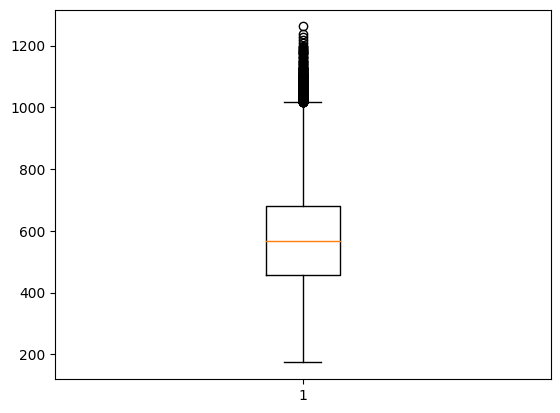

In [ ]:
#Flight_Price
plt.boxplot(df['flight_price'] )

# show plot
plt.show()

In [ ]:
Q1 = df['flight_price'].quantile(0.25)
Q3 = df['flight_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(118.70499999999987, 1016.2850000000003)

In [ ]:
df.flight_price = df.flight_price.clip(lower_bound , upper_bound)

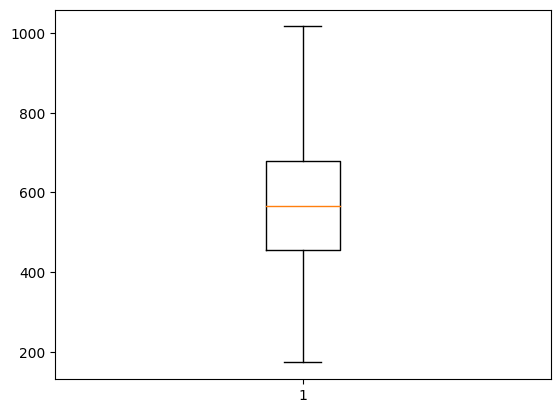

In [ ]:
#after outlier remove
plt.boxplot(df['flight_price'])
plt.show()

#EDA(Exploratary Data Analysis)
#plotting barplot for all the categorical columns

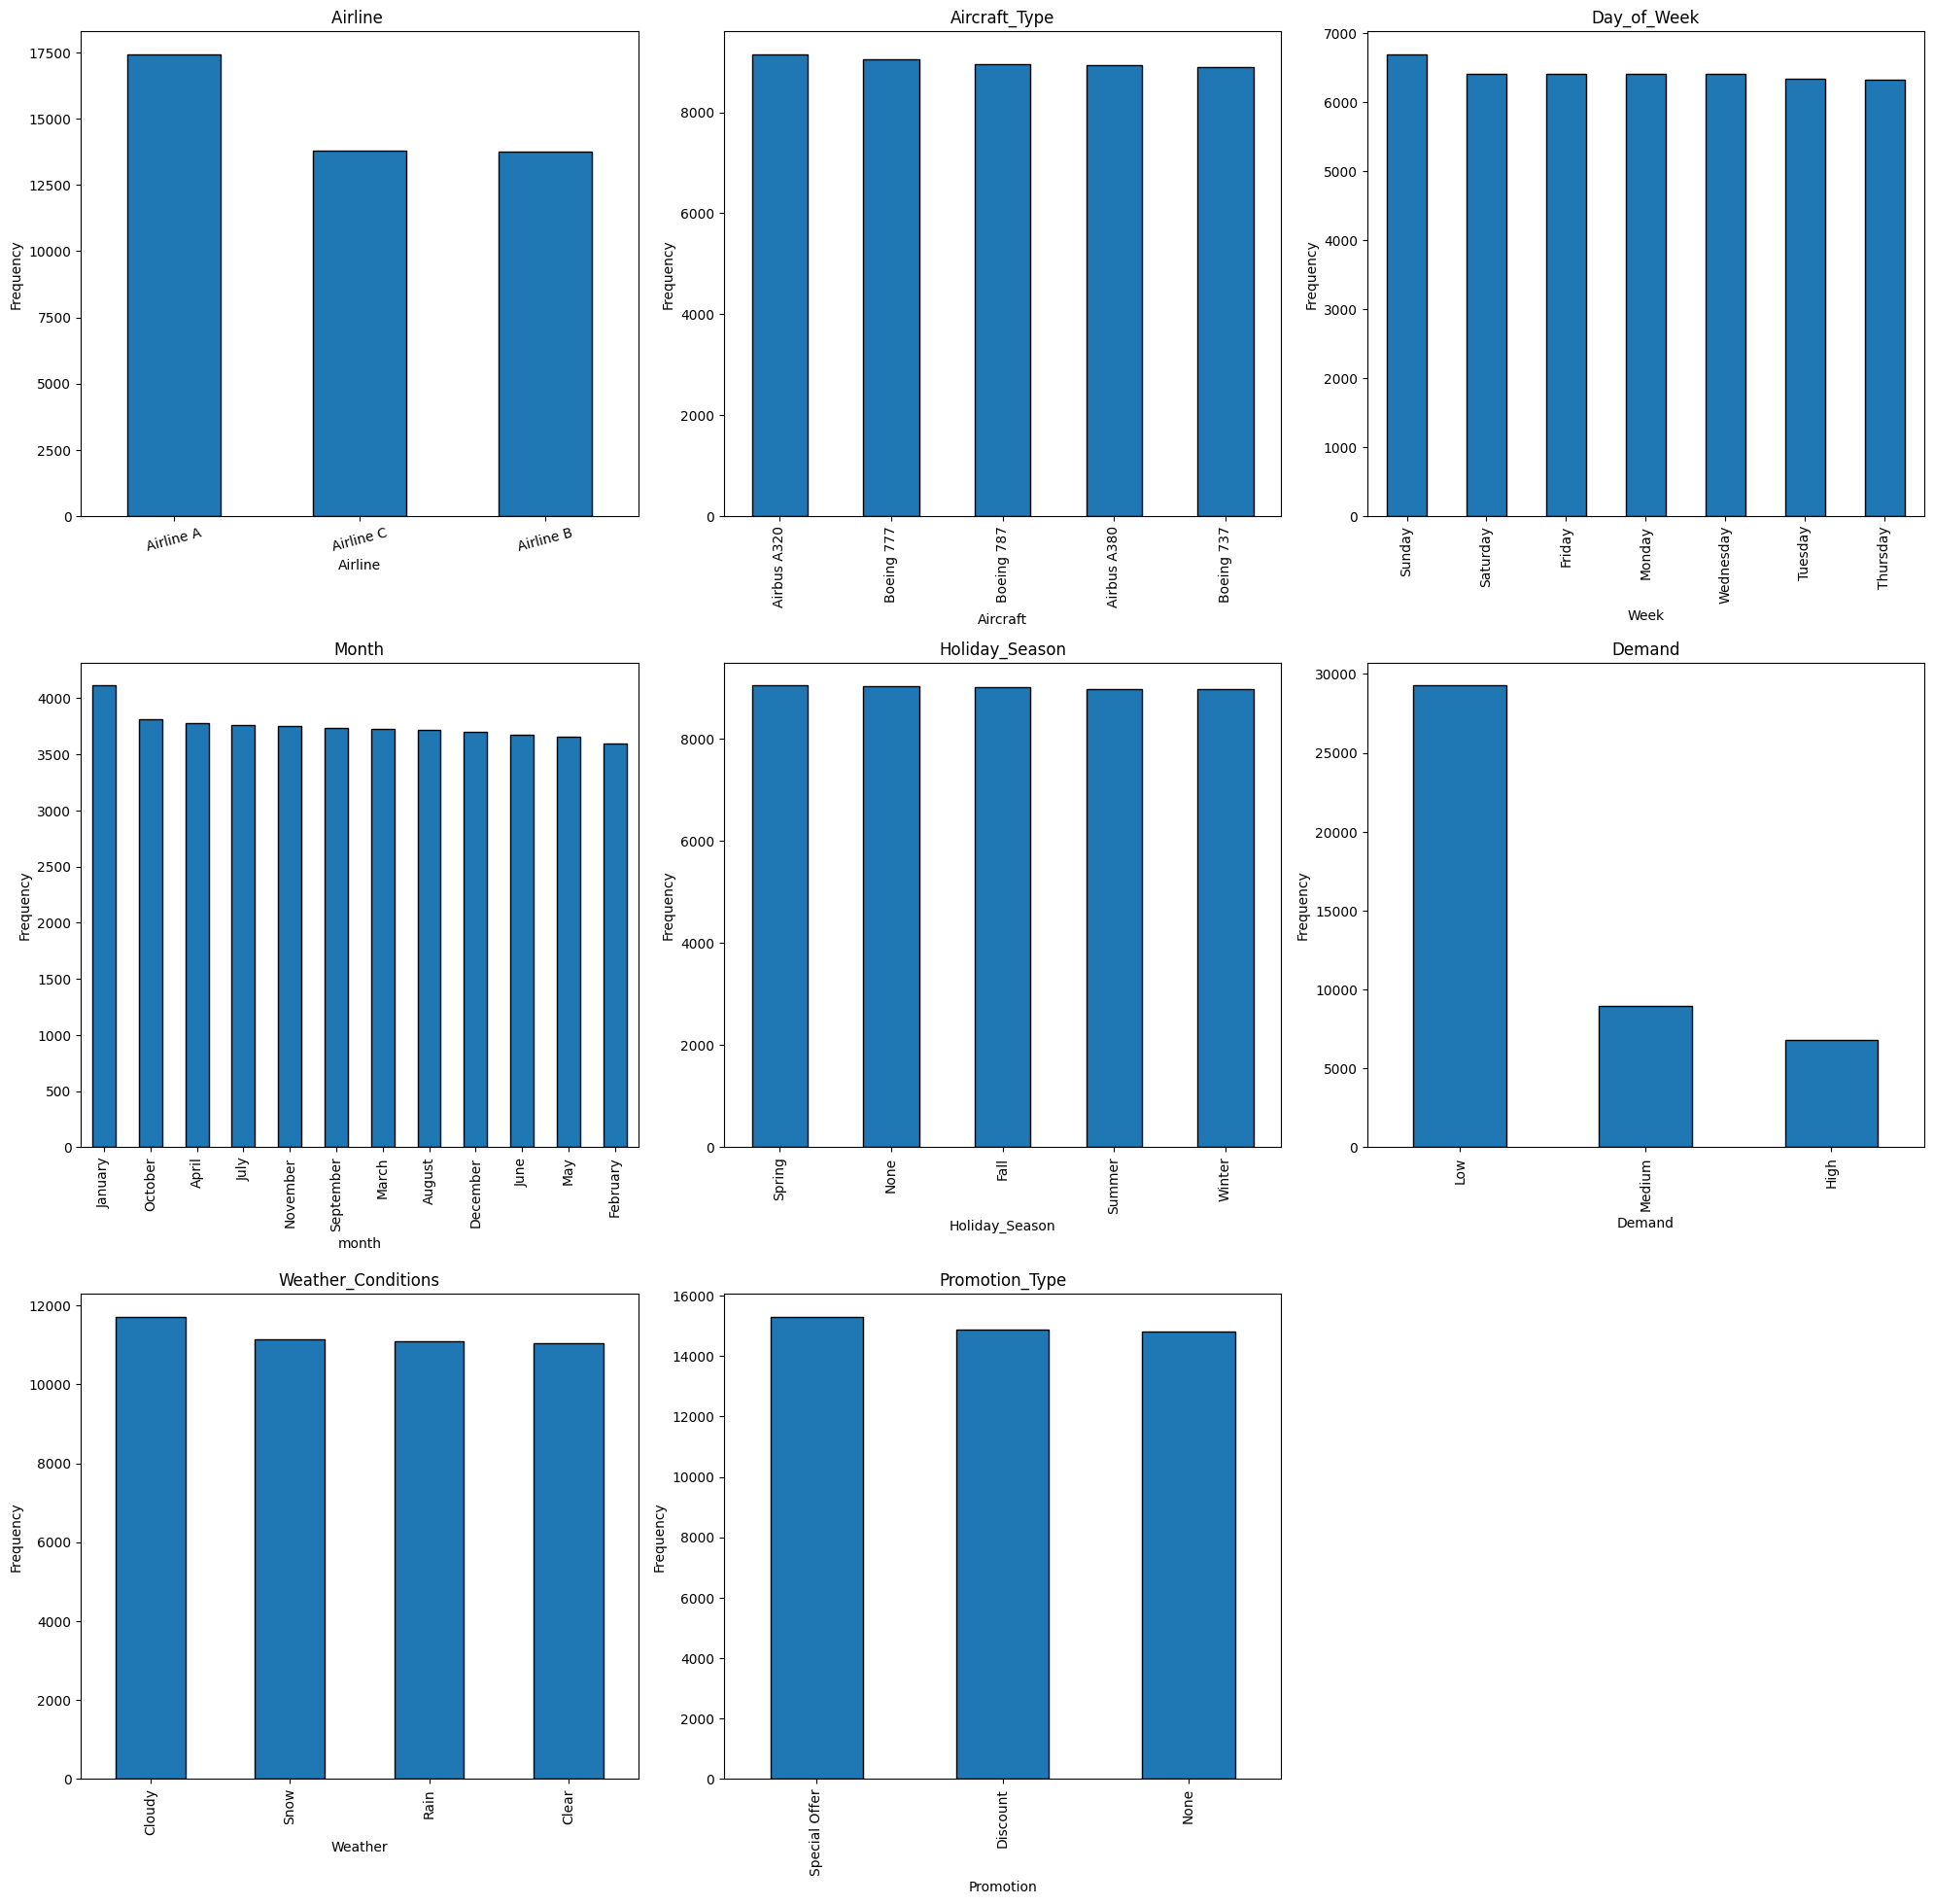

In [ ]:
# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 25))



plt.subplot(431)
df['airline'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Airline ')
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['aircraft_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Aircraft_Type')
plt.xlabel('Aircraft')
plt.ylabel('Frequency')

plt.subplot(433)
df['day_of_week'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Day_of_Week')
plt.xlabel('Week')
plt.ylabel('Frequency')

plt.subplot(434)
df['month_of_travel'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Month')
plt.xlabel('month')
plt.ylabel('Frequency')

plt.subplot(435)
df['holiday_season'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Holiday_Season')
plt.xlabel('Holiday_Season')
plt.ylabel('Frequency')

plt.subplot(436)
df['demand'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Demand')
plt.xlabel('Demand')
plt.ylabel('Frequency')

plt.subplot(437)
df['weather_conditions'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Weather_Conditions')
plt.xlabel('Weather')
plt.ylabel('Frequency')

plt.subplot(438)
df['promotion_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Promotion_Type')
plt.xlabel('Promotion')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#Feature Vs Target (Categorical Data)

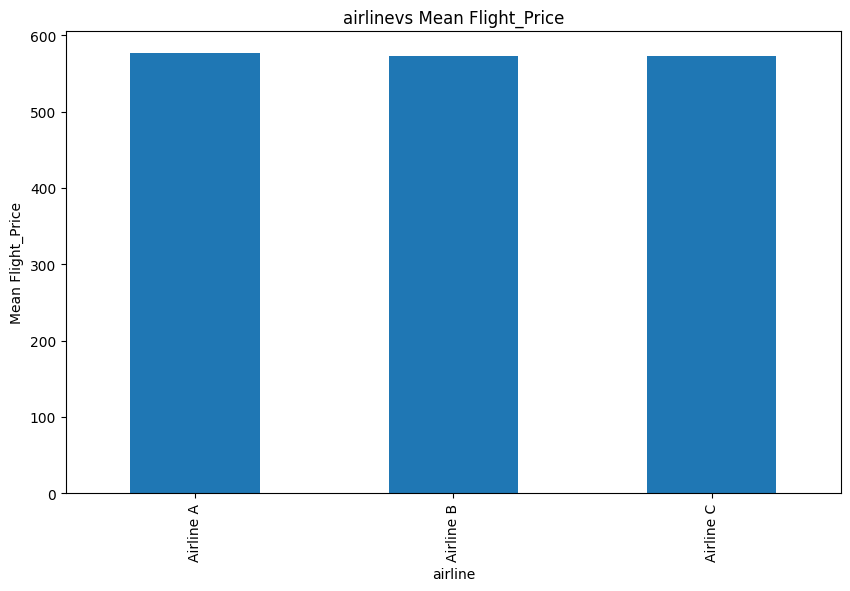

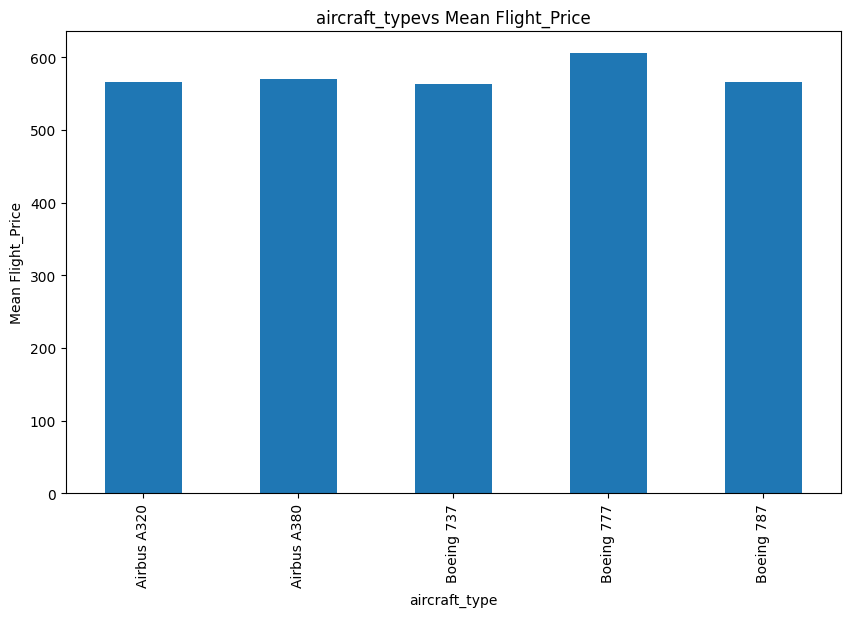

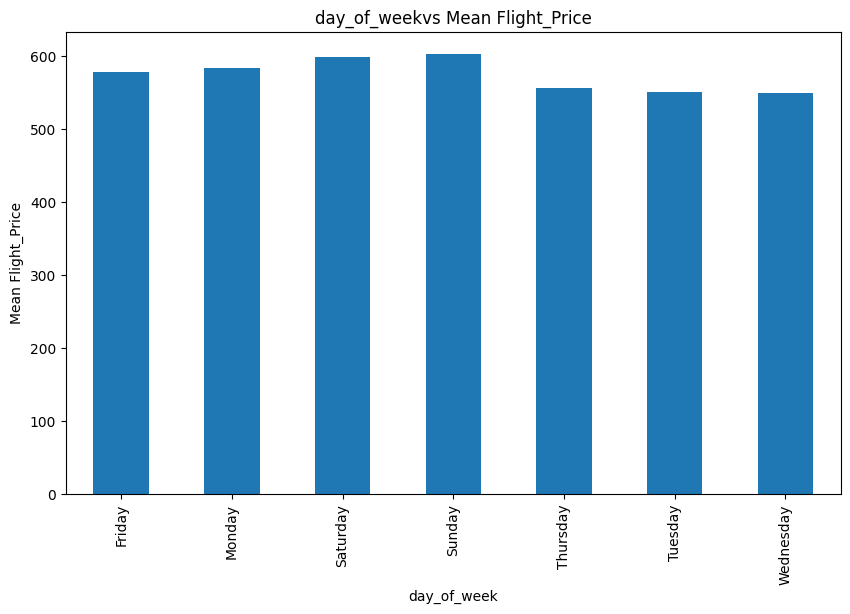

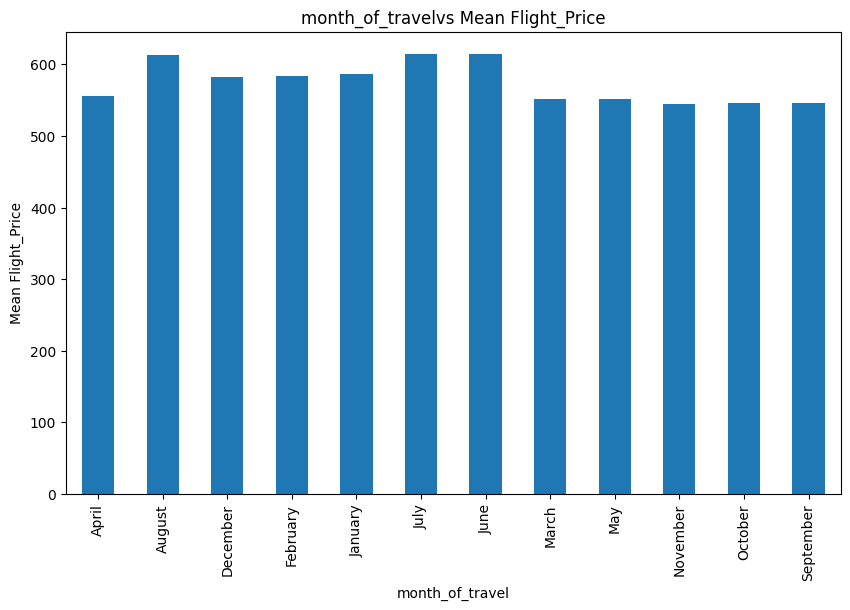

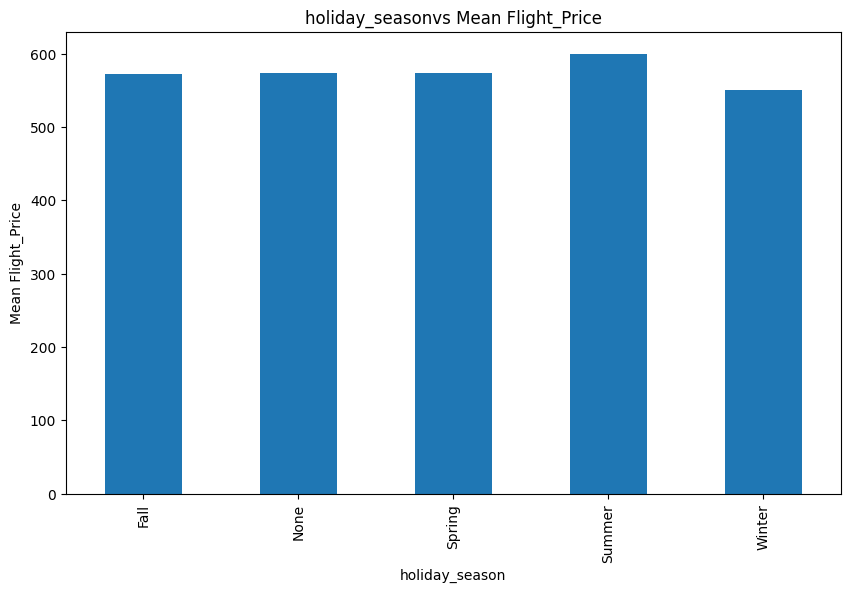

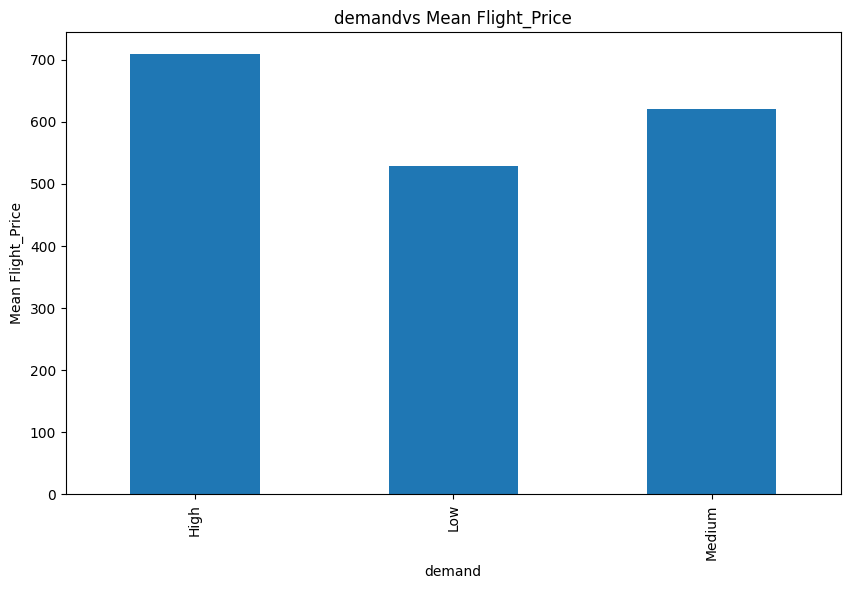

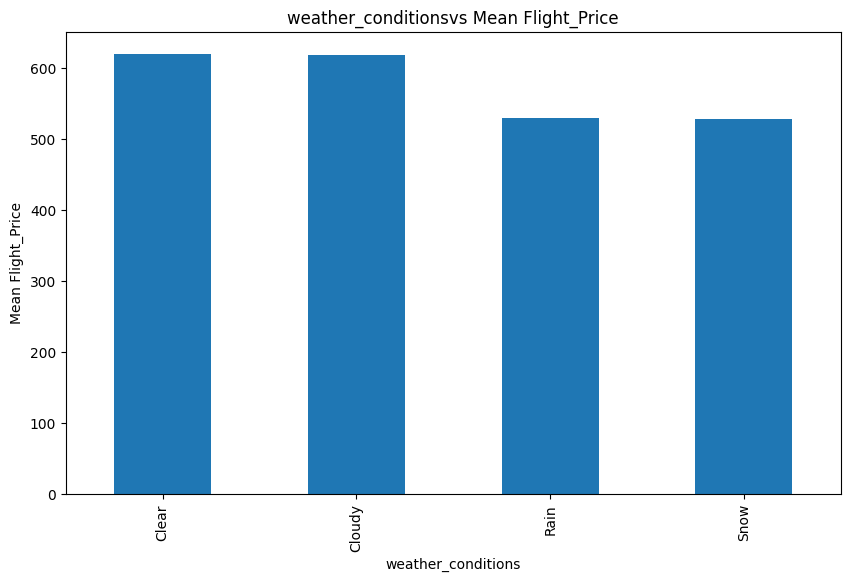

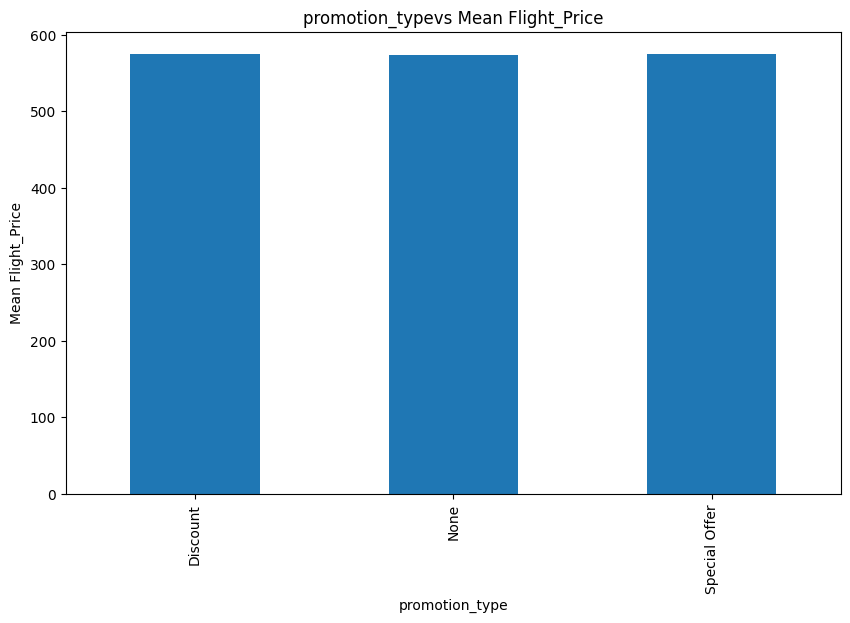

In [ ]:
#List of features to plot
features = ['airline','aircraft_type','day_of_week','month_of_travel',
            'holiday_season','demand','weather_conditions','promotion_type']

for feature in features:
    plt.figure(figsize =(10,6))
    df.groupby(feature)['flight_price'].mean().plot(kind ='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean Flight_Price')
    plt.title(f'{feature}vs Mean Flight_Price')
    plt.show()

In [ ]:
#Feature vs Target(Continues Data)

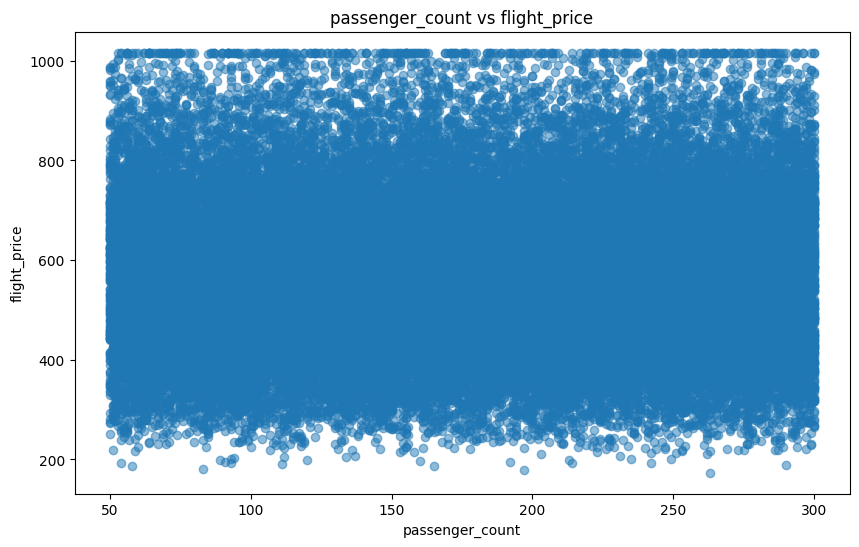

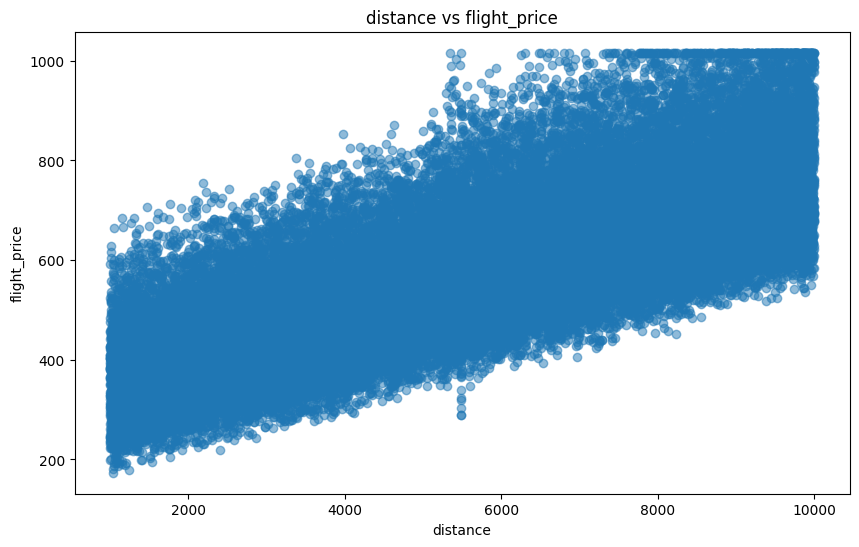

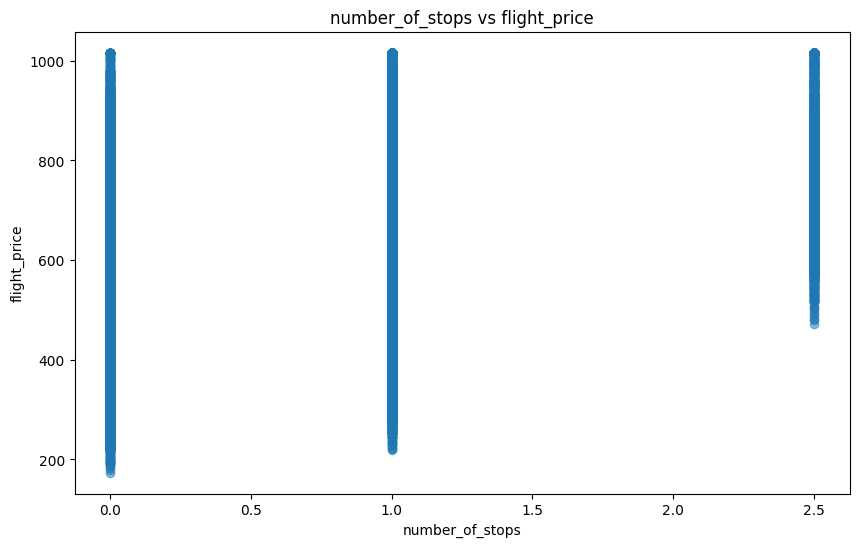

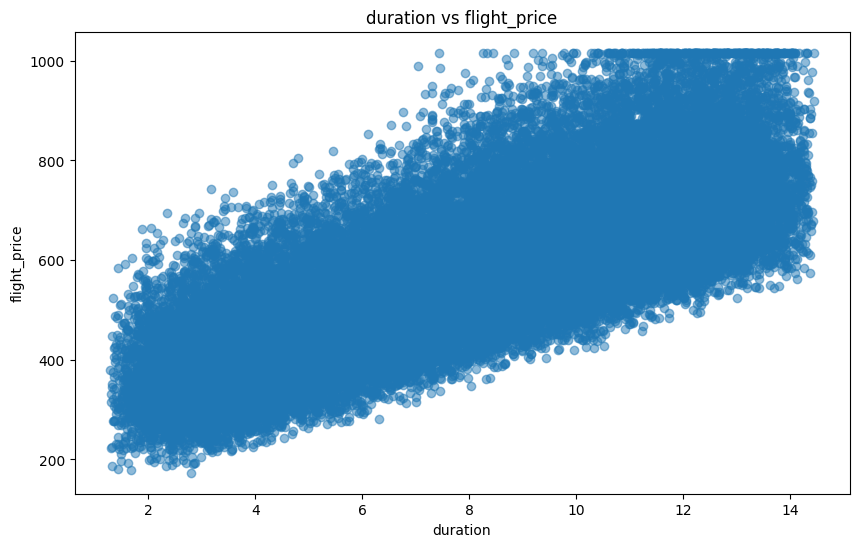

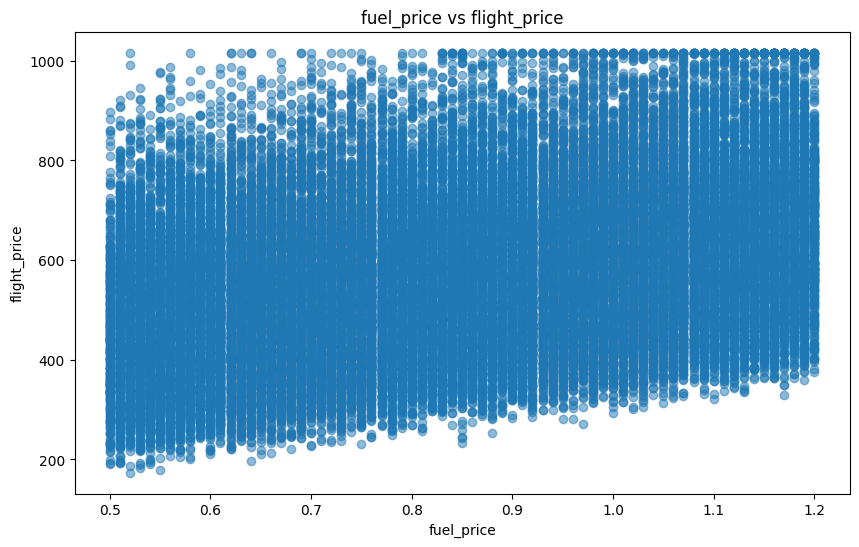

In [ ]:
features = [ 'passenger_count','distance','number_of_stops', 'duration', 'fuel_price']
target = 'flight_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

In [ ]:
#delete Use less columns
del df['departure_time']
del df['arrival_time']

#Encoding Categorical Varibables

In [ ]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['airline',
 'departure_city',
 'arrival_city',
 'aircraft_type',
 'day_of_week',
 'month_of_travel',
 'holiday_season',
 'demand',
 'weather_conditions',
 'promotion_type']

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [ ]:
# using labelEncoding beacuse its ordinal relationships its assigns a unique numerical label to each category within a categorical feature.

# Define the columns to be encoded with label encoding
ordinal_cols = ['day_of_week', 'month_of_travel', 'holiday_season', 'demand', 'promotion_type','airline', 'aircraft_type','weather_conditions']
for col in ordinal_cols:
    df1[col] = le.fit_transform(df1[col])
df1.head(2)

,airline,departure_city,arrival_city,distance,duration,aircraft_type,number_of_stops,day_of_week,month_of_travel,holiday_season,demand,weather_conditions,passenger_count,promotion_type,fuel_price,flight_price
0,1,Port Michael,Greenshire,8286.0,11.94,4,0.0,6,2,3,1,2,240,2,0.91,643.93
1,2,Leonardland,New Stephen,2942.0,5.29,0,0.0,6,7,2,1,2,107,1,1.08,423.13


In [ ]:
print(df1.columns)

Index(['airline', 'departure_city', 'arrival_city', 'distance', 'duration',
       'aircraft_type', 'number_of_stops', 'day_of_week', 'month_of_travel',
       'holiday_season', 'demand', 'weather_conditions', 'passenger_count',
       'promotion_type', 'fuel_price', 'flight_price'],
      dtype='object')


In [ ]:
# List of columns to drop
columns_to_drop = ['departure_city', 'arrival_city',]

# Dropping the specified columns and updating the DataFrame in-place
df1.drop(columns_to_drop, axis=1, inplace=True)

# Displaying the first few rows of the modified DataFrame
df1.head()

,airline,distance,duration,aircraft_type,number_of_stops,day_of_week,month_of_travel,holiday_season,demand,weather_conditions,passenger_count,promotion_type,fuel_price,flight_price
0,1,8286.0,11.94,4,0.0,6,2,3,1,2,240,2,0.91,643.93
1,2,2942.0,5.29,0,0.0,6,7,2,1,2,107,1,1.08,423.13
2,1,2468.0,4.41,4,1.0,3,11,3,0,1,131,2,0.52,442.17
3,0,3145.0,4.96,4,0.0,3,3,0,1,1,170,0,0.71,394.42
4,1,5558.0,8.09,2,1.0,4,4,1,1,0,181,1,1.09,804.35


#Spliting

In [ ]:
X = df1.drop('flight_price',axis=1)
y = df1['flight_price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=80)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(36000, 13) (9000, 13) (36000,) (9000,)


#Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[-1.10605562,  1.28669349,  1.30375666, ...,  1.17685644,
         -1.22929293,  0.49819929],
        [ 0.0995641 , -0.12412517,  0.17826438, ...,  1.32905981,
         -1.22929293,  0.29962541],
        [ 0.0995641 ,  0.2961515 ,  0.10242258, ..., -0.9678274 ,
         -1.22929293,  0.44855582],
        ...,
        [ 1.30518381,  1.3695921 ,  1.27341994, ...,  1.52277318,
         -0.00803992, -1.38825253],
        [-1.10605562, -0.92766332, -1.09284416, ...,  0.15294286,
          1.2132131 , -0.99110478],
        [-1.10605562, -0.92149412, -1.19902268, ..., -0.89864405,
         -1.22929293, -0.99110478]]),
 array([[ 0.0995641 , -1.34022849, -1.60553471, ...,  0.36049291,
          1.2132131 ,  0.29962541],
        [-1.10605562,  1.59708131,  1.77700948, ..., -0.81562403,
         -1.22929293,  0.94499051],
        [ 0.0995641 , -0.93730269, -0.97453095, ...,  0.12526952,
         -1.22929293, -0.84217437],
        ...,
        [-1.10605562, -0.10446085, -0.32229149, ...,  

#Model_Fit

In [ ]:
pip install xgboost

In [ ]:
# Import necessary libraries
import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression
from sklearn.model_selection import train_test_split

In [ ]:
# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(X_train, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

cross_val_scores = []  # Change the variable name to avoid conflict

for lr in [0.01, 0.05, 0.08, 0.1, 0.2, 0.25, 0.3]:
    xgb_regressor = xgb.XGBRegressor(learning_rate=lr, n_estimators=100)
    xgb_regressor.fit(X_train, y_train)
    score = cross_val_score(xgb_regressor, X_train, y_train, cv=15).mean()
    print("Learning rate:", lr, "cross_val_score:", score)
    cross_val_scores.append(score)

Learning rate: 0.01 cross_val_score: 0.7895730732892848
Learning rate: 0.05 cross_val_score: 0.9875588666551796
Learning rate: 0.08 cross_val_score: 0.9907569035207727
Learning rate: 0.1 cross_val_score: 0.991016593589812
Learning rate: 0.2 cross_val_score: 0.9905650319809529
Learning rate: 0.25 cross_val_score: 0.9901300378291906
Learning rate: 0.3 cross_val_score: 0.9896934770345395


In [ ]:
cross_val_xgb_regressor=max(cross_val_scores)
print("The best Learning rate is 0.1 and Cross_val_score is:",cross_val_xgb_regressor)

The best Learning rate is 0.1 and Cross_val_score is: 0.991016593589812


#R2_Score

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_pred_xgb=xgb_regressor.predict(X_test)

R2_score_xgb=r2_score(y_test,y_pred_xgb)

print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Extreme-Gradient Boosting Regression Model:  0.9905967097407823


#Feature Importance

In [ ]:
xgb_regressor.feature_importances_

array([0.00035619, 0.26944986, 0.14660685, 0.00048612, 0.09638505,
       0.02961885, 0.03477105, 0.00148208, 0.30990496, 0.0173152 ,
       0.00051614, 0.00033782, 0.0927698 ], dtype=float32)

In [ ]:
df.columns

Index(['airline', 'departure_city', 'arrival_city', 'distance', 'duration',
       'aircraft_type', 'number_of_stops', 'day_of_week', 'month_of_travel',
       'holiday_season', 'demand', 'weather_conditions', 'passenger_count',
       'promotion_type', 'fuel_price', 'flight_price'],
      dtype='object')

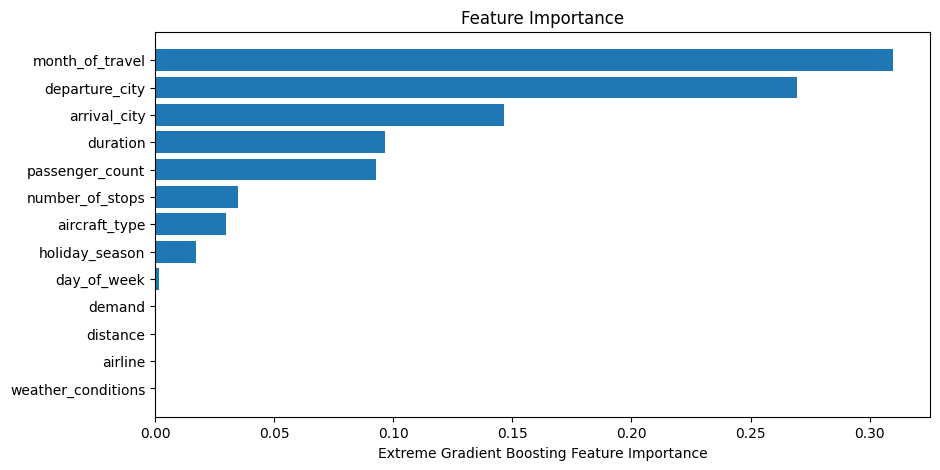

In [ ]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()